<h1>18BCS6212<h1>
    <h2>Assignment-1<h2>
        <h2>Step1: Reading and Understanding data.<h2>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from functools import reduce

In [3]:
#Importing all the csv files.

cars_trucks1 = pd.read_csv(r'C:\Users\lenovo\Downloads\co2_prediction\cars_trucks_and_buses_per_1000_persons.csv', encoding = 'ISO-8859-1')
co2_emissions1 = pd.read_csv(r'C:\Users\lenovo\Downloads\co2_prediction\co2_emissions_tonnes_per_person.csv', encoding = 'ISO-8859-1')
coal_consumption1 = pd.read_csv(r'C:\Users\lenovo\Downloads\co2_prediction\coal_consumption_per_cap.csv', encoding = 'ISO-8859-1')
electricity_generation1 = pd.read_csv(r'C:\Users\lenovo\Downloads\co2_prediction\electricity_generation_per_person.csv', encoding = 'ISO-8859-1')
electricity_use1 = pd.read_csv(r'C:\Users\lenovo\Downloads\co2_prediction\electricity_use_per_person.csv', encoding = 'ISO-8859-1')
forest_coverage1 = pd.read_csv(r'C:\Users\lenovo\Downloads\co2_prediction\forest_coverage_percent.csv', encoding = 'ISO-8859-1')
hydro_power1 = pd.read_csv(r'C:\Users\lenovo\Downloads\co2_prediction\hydro_power_generation_per_person.csv', encoding = 'ISO-8859-1')
income1 = pd.read_csv(r'C:\Users\lenovo\Downloads\co2_prediction\income_per_person_gdppercapita_ppp_inflation_adjusted.csv', encoding = 'ISO-8859-1')
industry1 = pd.read_csv(r'C:\Users\lenovo\Downloads\co2_prediction\industry_percent_of_gdp.csv', encoding = 'ISO-8859-1')
natural1 = pd.read_csv(r'C:\Users\lenovo\Downloads\co2_prediction\natural_gas_production_per_person.csv', encoding = 'ISO-8859-1')
oil_consumption1 = pd.read_csv(r'C:\Users\lenovo\Downloads\co2_prediction\oil_consumption_per_cap.csv', encoding = 'ISO-8859-1')
oil_production1 = pd.read_csv(r'C:\Users\lenovo\Downloads\co2_prediction\oil_production_per_person.csv', encoding = 'ISO-8859-1')
yearly_emissions1 = pd.read_csv(r'C:\Users\lenovo\Downloads\co2_prediction\yearly_co2_emissions_1000_tonnes.csv', encoding = 'ISO-8859-1')

<h2>Step2: Extracting 'geo' and '2014' columns.<h2>

In [4]:
cars_trucks1.head()

,geo,2002,2003,2004,2005,2006,2007
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,22.8
1,Albania,73.0,NaN,85.0,87.5,97.3,102.0
2,Algeria,NaN,88.0,89.0,91.0,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,39.6
4,Argentina,NaN,NaN,NaN,NaN,NaN,314.0


<h3>As cars_trucks1 doesn't have 2014 column so we have to drop this column.<h3>

In [5]:
co2_emissions1.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [6]:
#Adding geo and 2014 columns to co2_emissions dataframe and rrenaming column 2014.

co2_emissions = co2_emissions1[['geo','2014']]
co2_emissions.rename(columns = {'2014': 'co2_emissions'}, inplace = True)


In [7]:
coal_consumption1.head()

,geo,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,0.00554,0.00524,0.00389,0.0040,0.00495,0.0057,0.00154,0.0013,0.00146,...,0.02210,0.02170,0.01370,0.00858,0.00747,0.00777,0.00412,0.00458,0.00361,0.00356
1,Argentina,0.03570,0.03690,0.03560,0.0282,0.03710,0.0409,0.03310,0.0291,0.03010,...,0.03050,0.03450,0.02340,0.03080,0.03720,0.03110,0.02950,0.03460,0.03130,0.02410
2,Australia,1.53000,1.55000,1.55000,1.5500,1.57000,1.5500,1.53000,1.5700,1.61000,...,2.51000,2.57000,2.44000,2.23000,2.14000,1.98000,1.86000,1.82000,1.85000,1.82000
3,Austria,0.69600,0.66000,0.62100,0.6100,0.59700,0.6390,0.58300,0.5270,0.52200,...,0.47000,0.45000,0.34400,0.40200,0.41000,0.37900,0.38200,0.34700,0.37300,0.36400
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00014,0.00079,0.00046,0.00006,0.00038,0.00006,0.00031,0.00017,0.00004,0.00004


In [8]:
#Adding geo and 2014 columns to coal_consumption dataframe and renaming column 2014.

coal_consumption = coal_consumption1[['geo','2014']]
coal_consumption.rename(columns = {'2014':'coal_consumption'}, inplace = True)


In [9]:
#Adding geo and 2014 columns to electricity_generation dataframe and renaming column 2014.

electricity_generation = electricity_generation1[['geo','2014']]
electricity_generation.rename(columns = {'2014': 'electricity_generation'}, inplace = True)


In [10]:
#Adding geo and 2014 columns to electricity_use dataframe and renaming column 2014.

electricity_use = electricity_use1[['geo','2014']]
electricity_use.rename(columns = {'2014': 'electricity_use'}, inplace = True)


In [11]:
#Adding geo and 2014 columns to forest_coverage dataframe and renaming column 2014.

forest_coverage = forest_coverage1[['geo','2014']]
forest_coverage.rename(columns = {'2014': 'forest_coverage'}, inplace = True)


In [12]:
hydro_power1.head()

,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.09770,0.13500,0.15000,0.14700,0.14800,0.07560,0.10300,0.14000,0.20300,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00016,0.00071,0.00067,0.00145,0.00056,0.00057,0.00071,0.00075,0.00042,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00660,0.00692,0.00943,0.01160,0.01350,0.01230,0.01490,0.01430,0.01590,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.08190,0.07650,0.06830,0.07560,0.08360,0.06630,0.06590,0.07270,0.07150,NaN
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.04660,0.05570,0.05610,0.04970,0.05110,0.05180,0.05020,0.05630,0.07110,NaN


<h3>As hydro_power doesn't have 2014 column so we have to drop this column.<h3>

In [13]:
#Adding geo and 2014 columns to income dataframe and renaming column 2014.

income = income1[['geo','2014']]
income.rename(columns = {'2014':'income'}, inplace = True)


In [14]:
#Adding geo and 2014 columns to industry dataframe and renaming column 2014.

industry = industry1[['geo','2014']]
industry.rename(columns = {'2014': 'industry'}, inplace = True)


In [15]:
#Adding geo and 2014 columns to natural dataframe and renaming column 2014.

natural = natural1[['geo','2014']]
natural.rename(columns = {'2014':'natural'}, inplace = True)


In [16]:
#Adding geo and 2014 columns to oil_consumption dataframe and renaming column 2014.

oil_consumption = oil_consumption1[['geo','2014']]
oil_consumption.rename(columns = {'2014': 'oil_consumption'}, inplace = True)


In [17]:
#Adding geo and 2014 columns to oil_production dataframe and renaming column 2014.

oil_production = oil_production1[['geo','2014']]
oil_production.rename(columns = {'2014':'oil_production'}, inplace = True)


In [18]:
#Adding geo and 2014 columns to yearly_emissions dataframe and renaming column 2014.

yearly_emissions = yearly_emissions1[['geo','2014']]
yearly_emissions.rename(columns = {'2014': 'yearly_emissions'}, inplace = True)


<h3>Step3: Merging all the dataframes using 'geo' as the common column.<h3>

In [19]:
#Making a list of all the dataframes available.
dataframes = [co2_emissions, coal_consumption, electricity_generation, electricity_use, forest_coverage, income, industry, natural, oil_consumption, oil_production, yearly_emissions]

In [20]:
#Combining all the dataframes in the list dataframes into one master dataframe i.e. co2_emi.

co2_emi = reduce(lambda left,right : pd.merge(left,right,on = ['geo'], how = 'outer'), dataframes)

In [21]:
co2_emi.head()

,geo,co2_emissions,coal_consumption,electricity_generation,electricity_use,forest_coverage,income,industry,natural,oil_consumption,oil_production,yearly_emissions
0,Afghanistan,0.299,NaN,NaN,NaN,2.07,1780.0,21.10,NaN,NaN,NaN,9810.0
1,Albania,1.960,NaN,NaN,2310.0,28.20,10700.0,21.50,NaN,NaN,NaN,5720.0
2,Algeria,3.720,0.00458,1640.0,1360.0,0.82,13500.0,42.30,1.92,0.452,1.76,145000.0
3,Andorra,5.830,NaN,NaN,NaN,34.00,44900.0,9.91,NaN,NaN,NaN,462.0
4,Angola,1.290,NaN,NaN,312.0,46.50,6260.0,NaN,NaN,NaN,3.08,34800.0


In [22]:
co2_emi.geo.nunique()

194

In [23]:
co2_emi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 193
Data columns (total 12 columns):
geo                       194 non-null object
co2_emissions             192 non-null float64
coal_consumption          65 non-null float64
electricity_generation    65 non-null float64
electricity_use           137 non-null float64
forest_coverage           191 non-null float64
income                    193 non-null float64
industry                  183 non-null float64
natural                   49 non-null float64
oil_consumption           65 non-null float64
oil_production            49 non-null float64
yearly_emissions          192 non-null float64
dtypes: float64(11), object(1)
memory usage: 19.7+ KB


<h3>Treating missing values<h3>

In [24]:
#Finding the percentage of missing values in the columns of co2_emi.
co2_emi.isna().mean().round(4)*100

geo                        0.00
co2_emissions              1.03
coal_consumption          66.49
electricity_generation    66.49
electricity_use           29.38
forest_coverage            1.55
income                     0.52
industry                   5.67
natural                   74.74
oil_consumption           66.49
oil_production            74.74
yearly_emissions           1.03
dtype: float64

In [25]:
#Dropping the columns with missing values percentage >40%.
co2_emi.drop(['coal_consumption','electricity_generation', 'natural', 'oil_consumption', 'oil_production'], axis = 1, inplace = True)

In [26]:
#Filling the missing values in co2_emissions, electricity_use, forst_coverage, income, industry, yearly_emissions columns
#by the mean value.
co2_emi.fillna(co2_emi.mean(), inplace = True)

In [27]:
#Again checking the missing value percentage.
co2_emi.isna().mean().round(4)*100

geo                 0.0
co2_emissions       0.0
electricity_use     0.0
forest_coverage     0.0
income              0.0
industry            0.0
yearly_emissions    0.0
dtype: float64

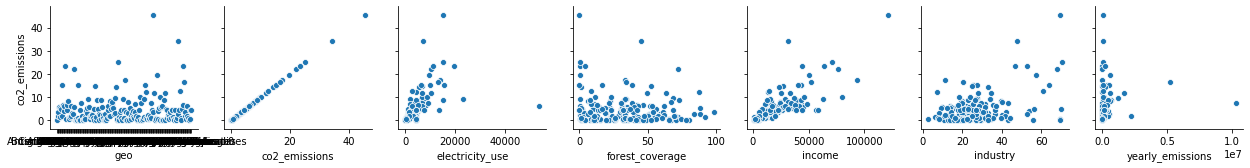

In [28]:
#Making pairplot for our target variable versus all other variables.
pp = sns.pairplot(data = co2_emi, y_vars=['co2_emissions'], x_vars= co2_emi.columns)

In [29]:
#Treating outliers that are possible.
co2_emi = co2_emi[co2_emi.income<100000]
co2_emi = co2_emi[co2_emi.electricity_use<40000]

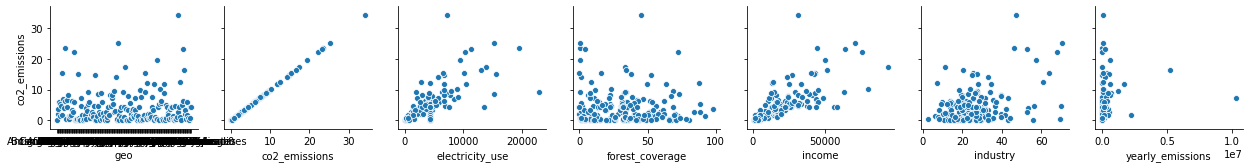

In [30]:
pp = sns.pairplot(data = co2_emi, y_vars=['co2_emissions'], x_vars= co2_emi.columns)


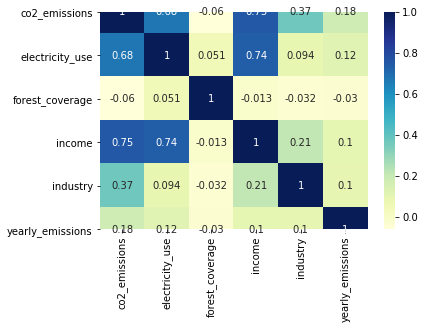

In [31]:
#Heatmap for the correlation between the variables.
plt.figuresize = (20,15)
sns.heatmap(co2_emi.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

In [32]:
#Dropping the categorical variable 'geo'.
co2_emi.drop(['geo'], axis = 1, inplace = True )

<h3>Step4: Splitting the data into train and test data.<h3>

In [33]:
#Spliting the data into train (df_train) and test (df_test) data.
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(co2_emi, train_size = 0.70, test_size = 0.30, random_state = 100)

In [34]:
#Using MinMaxScaler for scaling the co2_emi dataframe. 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
co2_emi.columns

Index(['co2_emissions', 'electricity_use', 'forest_coverage', 'income',
       'industry', 'yearly_emissions'],
      dtype='object')

In [36]:
num_var = co2_emi.columns

In [37]:
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,co2_emissions,electricity_use,forest_coverage,income,industry,yearly_emissions
93,0.032367,0.215460,0.016073,0.024304,0.385475,0.000239
75,0.049348,0.039211,0.241099,0.058612,0.335816,0.217475
76,0.051983,0.039517,0.514751,0.116546,0.556176,0.045048
150,0.164117,0.260774,0.409969,0.332697,0.391682,0.002980
83,0.275958,0.397781,0.696846,0.459622,0.335816,0.117475


In [38]:
#Assing our target variable to y_train and other independent variables to X_train.
y_train = df_train.pop('co2_emissions')
X_train = df_train

In [39]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import os



<h3>Step5: Model Building using Lasso<h3>

In [40]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [41]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002397,0.001002,0.000798,0.000399,0.0001,{'alpha': 0.0001},-0.047688,-0.090053,-0.047380,-0.038802,...,-0.055974,0.017948,2,-0.053512,-0.045299,-0.054379,-0.056182,-0.053205,-0.052515,0.003754
1,0.000000,0.000000,0.003116,0.006232,0.001,{'alpha': 0.001},-0.049289,-0.081236,-0.046821,-0.036862,...,-0.054222,0.015007,1,-0.053787,-0.045588,-0.055194,-0.056868,-0.053550,-0.052998,0.003889
2,0.003131,0.006263,0.000000,0.000000,0.01,{'alpha': 0.01},-0.076770,-0.095384,-0.059590,-0.046925,...,-0.071193,0.016667,3,-0.071252,-0.059790,-0.070507,-0.074889,-0.070222,-0.069332,0.005055
3,0.003125,0.006249,0.000000,0.000000,0.05,{'alpha': 0.05},-0.121692,-0.123114,-0.103560,-0.099425,...,-0.113196,0.009824,4,-0.106691,-0.105675,-0.116249,-0.121112,-0.105523,-0.111050,0.006430
4,0.000000,0.000000,0.000000,0.000000,0.1,{'alpha': 0.1},-0.121692,-0.123114,-0.103560,-0.099425,...,-0.113196,0.009824,4,-0.106691,-0.105675,-0.116249,-0.121112,-0.105523,-0.111050,0.006430


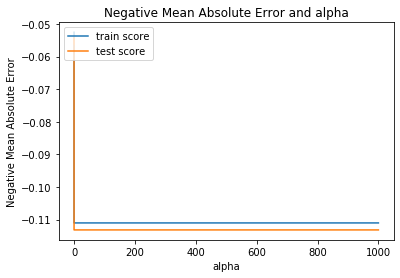

In [42]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<h3>Step6: Optimal value of alpha.<h3>

In [43]:
#Finding the Optimal value of alpha
model_cv.best_params_

{'alpha': 0.001}

In [44]:
alpha = 0.001
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
lasso_coeffs = lasso.coef_

In [46]:
#Assigning the dependent variable to y_test and independent variables to X_text.
y_test = df_test.pop('co2_emissions')
X_test = df_test

In [47]:
y_predict = lasso.predict(X_test)

<h3>Step7: Scatter plot between y_test (actual)  Vs  y_predict (predicted) data.<h3>

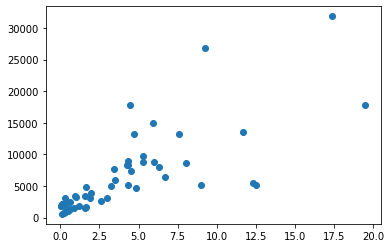

In [48]:
plt.scatter(y_test, y_predict)